# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
url_weather="http://api.openweathermap.org/data/2.5/weather?"
url=f"{url_weather}appid={weather_api_key}&q={city}"

response=requests.get(url)
data=response.json()
data

{'coord': {'lon': 94.5, 'lat': 25.6667},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 295.66,
  'feels_like': 292.31,
  'temp_min': 295.66,
  'temp_max': 295.66,
  'pressure': 1010,
  'humidity': 24,
  'sea_level': 1010,
  'grnd_level': 834},
 'visibility': 10000,
 'wind': {'speed': 2.15, 'deg': 288},
 'clouds': {'all': 35},
 'dt': 1615364481,
 'sys': {'country': 'IN', 'sunrise': 1615334201, 'sunset': 1615376891},
 'timezone': 19800,
 'id': 1259784,
 'name': 'Phek',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#checking for the URL query

count_city=1

city_data=[]
coord_lat=[]
coord_lon=[]
main_max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
dt=[]

for city in cities:
    
    #retrive url and request the json file
    url_weather="http://api.openweathermap.org/data/2.5/weather?"
    query_url=f"{url_weather}appid={weather_api_key}&q={city}"
    weather_response=requests.get(query_url)
    weather_json=weather_response.json()
    
    #run loop on all cities with data needed.
    try:
        
        coord_lat.append(weather_json['coord']['lat'])
        coord_lon.append(weather_json['coord']['lon'])
        main_max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])
        city_data.append(city)
        print(f"Processing Record {count_city}|{city}")
    except:
         print(f'City not found. Skipping...{city}')
            
    count_city+=1

    

Processing Record 1|manokwari
Processing Record 2|mahebourg
Processing Record 3|hithadhoo
City not found. Skipping...vaitupu
City not found. Skipping...belushya guba
Processing Record 6|busselton
Processing Record 7|chipinge
Processing Record 8|fortuna
Processing Record 9|pisco
Processing Record 10|puerto ayora
Processing Record 11|te anau
Processing Record 12|ribeira grande
Processing Record 13|burns lake
Processing Record 14|vaini
City not found. Skipping...nizhneyansk
Processing Record 16|bluff
Processing Record 17|bud
Processing Record 18|mataura
Processing Record 19|karratha
City not found. Skipping...amderma
Processing Record 21|sola
Processing Record 22|kaeo
Processing Record 23|hilo
Processing Record 24|lavrentiya
Processing Record 25|guadalajara
Processing Record 26|kanniyakumari
Processing Record 27|harper
Processing Record 28|ambulu
Processing Record 29|bathsheba
City not found. Skipping...illoqqortoormiut
Processing Record 31|narsaq
Processing Record 32|mar del plata
Proces

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#!mkdir weather_CSV

city_dic={'City':city_data,
          'Lat':coord_lat,
          'lng':coord_lon,
          'Max Temp':main_max_temp,
          'Humidity':humidity,
          'Cloudiness':cloudiness,
          'Wind Speed':wind_speed,
          'Country':country,
          'Date':dt}
city_data_df=pd.DataFrame(city_dic)
city_data_df

#export the city data into .CSV
city_data_df.to_csv('weather_CSV/weather_data.csv')

#display the data frame.
city_data_df

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manokwari,-0.8667,134.0833,299.89,77,87,3.11,ID,1615364481
1,mahebourg,-20.4081,57.7000,303.15,66,40,5.66,MU,1615364481
2,hithadhoo,-0.6000,73.0833,302.13,63,4,2.59,MV,1615364482
3,busselton,-33.6500,115.3333,303.71,55,91,1.79,AU,1615364482
4,chipinge,-20.1883,32.6236,298.28,57,0,1.32,ZW,1615364483
...,...,...,...,...,...,...,...,...,...
392,vitoria da conquista,-14.8661,-40.8394,290.32,91,29,1.50,BR,1615364410
393,marquette,46.5333,-87.6335,280.93,70,100,0.89,US,1615364599
394,spas-demensk,54.4122,34.0226,261.93,95,100,2.43,RU,1615364599
395,wasilla,61.5814,-149.4394,273.15,93,90,1.76,US,1615364600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#sortting all the values under humidity 
humidity_df=city_data_df.sort_values('Humidity',ascending=False)
humidity_df
#This step needs to be skiped since there is no values over 100 under humidity.

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
274,ruteng,-8.6136,120.4721,293.87,100,100,0.58,ID,1615364563
65,orange cove,36.6244,-119.3137,283.15,100,75,3.60,US,1615364501
266,ancud,-41.8697,-73.8203,287.59,100,90,4.12,CL,1615364561
190,macae,-22.3708,-41.7869,295.15,100,40,1.54,BR,1615364539
161,airai,-8.9266,125.4092,291.13,100,100,0.41,TL,1615364530
...,...,...,...,...,...,...,...,...,...
187,marsa matruh,31.3525,27.2453,295.15,15,0,6.17,EG,1615364538
315,kutum,14.2000,24.6667,301.61,12,0,3.60,SD,1615364575
134,athmallik,20.7219,84.5348,312.58,11,4,3.10,IN,1615364522
85,riyadh,24.6877,46.7219,299.15,11,0,3.60,SA,1615364217


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

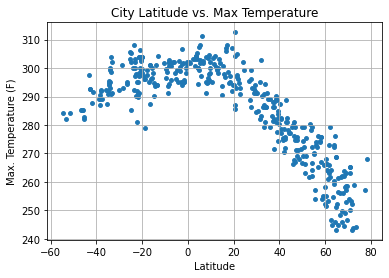

In [15]:
#!mkdir figure
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s=15)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsTemperaturePlot.png")

plt.show()

## Latitude vs. Humidity Plot

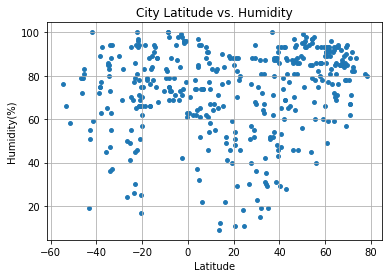

In [16]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], s=15)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsHumidityPlot.png")

plt.show()

## Latitude vs. Cloudiness Plot

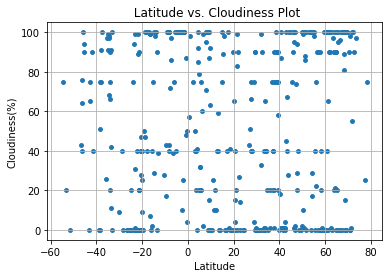

In [17]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], s=15)

plt.title(" Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsCloudinessPlot.png")

plt.show()

## Latitude vs. Wind Speed Plot

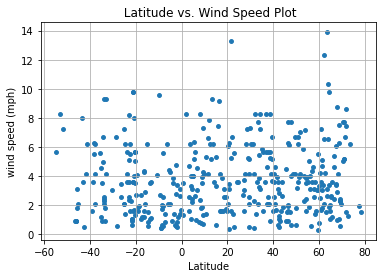

In [18]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], s=15)

plt.title(" Latitude vs. Wind Speed Plot")
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figure/plotLatitudeVsWindSpeedPlot.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression